# Iowa House Price Prediction via Advanced ML methods

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to predict the final price of each home.

## Evaluation
### Goal
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Source
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

## Data Description

In [1]:
with open('data_description.txt', 'r') as file:
    content = file.read()

print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Load basic Python libraries

In [2]:
import emoji

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Data Exploration

### df_train

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# Show unique values for each variable 
def display_unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"Unique values in column '{column}':\n {unique_values}\n")

display_unique_values(df_train)

Unique values in column 'MSSubClass':
 [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Unique values in column 'MSZoning':
 ['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values in column 'LotFrontage':
 [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Unique values in column 'LotArea':
 [ 8450  9600 11250 ... 17217 13175  9717]

Unique values in column 'Street':
 ['Pave' 'Grvl']

Unique values in column 'Alley':
 [nan 'Grvl' 'Pave']

Unique values in column 'LotShape':
 

Unique values in column 'SaleType':
 ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

Unique values in column 'SaleCondition':
 ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

Unique values in column 'SalePrice':
 [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 176000 155000 3

In [8]:
# Check for missing data
def display_nul_values(dataframe):
    nan_found = False
    for column in dataframe.columns:
        nul_values = dataframe[column].isna().sum()
        if nul_values > 0:
            print(f"Null values in column '{column}':\n {nul_values}\n")
            nan_found = True

    if not nan_found:
        print('No nan columns identified')

display_nul_values(df_train)

Null values in column 'LotFrontage':
 259

Null values in column 'Alley':
 1369

Null values in column 'MasVnrType':
 8

Null values in column 'MasVnrArea':
 8

Null values in column 'BsmtQual':
 37

Null values in column 'BsmtCond':
 37

Null values in column 'BsmtExposure':
 38

Null values in column 'BsmtFinType1':
 37

Null values in column 'BsmtFinType2':
 38

Null values in column 'Electrical':
 1

Null values in column 'FireplaceQu':
 690

Null values in column 'GarageType':
 81

Null values in column 'GarageYrBlt':
 81

Null values in column 'GarageFinish':
 81

Null values in column 'GarageQual':
 81

Null values in column 'GarageCond':
 81

Null values in column 'PoolQC':
 1453

Null values in column 'Fence':
 1179

Null values in column 'MiscFeature':
 1406



In [9]:
display_nul_values(df_test)

Null values in column 'MSZoning':
 4

Null values in column 'LotFrontage':
 227

Null values in column 'Alley':
 1352

Null values in column 'Utilities':
 2

Null values in column 'Exterior1st':
 1

Null values in column 'Exterior2nd':
 1

Null values in column 'MasVnrType':
 16

Null values in column 'MasVnrArea':
 15

Null values in column 'BsmtQual':
 44

Null values in column 'BsmtCond':
 45

Null values in column 'BsmtExposure':
 44

Null values in column 'BsmtFinType1':
 42

Null values in column 'BsmtFinSF1':
 1

Null values in column 'BsmtFinType2':
 42

Null values in column 'BsmtFinSF2':
 1

Null values in column 'BsmtUnfSF':
 1

Null values in column 'TotalBsmtSF':
 1

Null values in column 'BsmtFullBath':
 2

Null values in column 'BsmtHalfBath':
 2

Null values in column 'KitchenQual':
 1

Null values in column 'Functional':
 2

Null values in column 'FireplaceQu':
 730

Null values in column 'GarageType':
 76

Null values in column 'GarageYrBlt':
 78

Null values in colum

- [x] LotFrontage: Need to deal with missing values 
- [x] Alley: Contains NA, but from data description file, this means no alley access. Consider changing this to some other descriptor
- [x] MasVnrType: Need to deal with missing values
- [x] MasVnrArea: Related to MasVnrType, hence need to deal with missing values
- [x] BsmtQual: Contains NA, but from data description file, this means no basement. Consider changing this to some other descriptor
- [x] BsmtCond: Related to Bsmtqual
- [x] BsmtExposure: Related to Bsmtqual, but contains additioal NA
- [x] BsmtFinType1: Related to Bsmtqual, but contains additioal NA
- [x] BsmtFinType2: Related to Bsmtqual, but contains additioal NA
- [x] Electrical: Contains 1 NA which must be dealt with
- [x] FireplaceQu: Contains NA, but from data description file, this means no fireplace. Consider changing this to some other descriptor
- [x] GarageType: Contains NA, but from data description file, this means no garage. Consider changing this to some other descriptor
- [x] GarageYrBlt, GarageFinish, GarageQual, GarageCond: Related to GarageType, hence handle accordingly
- [x] PoolQC: Contains NA, but from data description file, this means no pool. Consider changing this to some other descriptor
- [x] Fence: Contains NA, but from data description file, this means no fence. Consider changing this to some other descriptor
- [x] MiscFeature: Contains NA, but from data description file, this means no misc features. Consider changing this to some other descriptor

In [10]:
# LotFrontage
# Fill nan with median value of neighborhood

def fill_missing_lot_frontage(df):
    # Calculate the median lot frontage for each neighborhood
    median_frontage_by_neighborhood = df.groupby('Neighborhood')['LotFrontage'].transform('median')
    
    # Fill missing values in 'lot_frontage' with the calculated medians
    df['LotFrontage'].fillna(median_frontage_by_neighborhood, inplace=True)
    
    return df

df_train = fill_missing_lot_frontage(df_train)
df_test = fill_missing_lot_frontage(df_test)

In [11]:
df_train['LotFrontage'].isna().sum()

0

In [12]:
df_test['LotFrontage'].isna().sum()

0

In [13]:
# Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, 
# GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

# Contains nan, but from data description file, this means no alley access. Consider changing this to some other
# descriptor
# Fill nan with 'None'

def fill_nan_with_none(dataframe, columns):
    for column in columns:
        dataframe[column].fillna('None', inplace=True)
    return dataframe

columns_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

df_train = fill_nan_with_none(df_train, columns_list)
df_test = fill_nan_with_none(df_test, columns_list)

In [14]:
# 'MasVnrType' contains only 8 nan entries, and 'Electrical' only 1 nan entry, hence the rows with nan will be 
# dropped. MasVnrArea is related to MasVnrType, hence dropping it's nan values will not increase total number of 
# rows dropped. In total only 9 out of 1460 rows (0.62%) will be dropped, which should thus have minimal impact
# on overall quality of the dataset.

df_train = df_train.dropna()
df_test = df_test.dropna()

In [15]:
# Check for missing data using display_nul_values function written earlier
display_nul_values(df_train)

No nan columns identified


In [16]:
display_nul_values(df_test)

No nan columns identified


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1370 non-null   int64  
 1   MSZoning       1370 non-null   object 
 2   LotFrontage    1370 non-null   float64
 3   LotArea        1370 non-null   int64  
 4   Street         1370 non-null   object 
 5   Alley          1370 non-null   object 
 6   LotShape       1370 non-null   object 
 7   LandContour    1370 non-null   object 
 8   Utilities      1370 non-null   object 
 9   LotConfig      1370 non-null   object 
 10  LandSlope      1370 non-null   object 
 11  Neighborhood   1370 non-null   object 
 12  Condition1     1370 non-null   object 
 13  Condition2     1370 non-null   object 
 14  BldgType       1370 non-null   object 
 15  HouseStyle     1370 non-null   object 
 16  OverallQual    1370 non-null   int64  
 17  OverallCond    1370 non-null   int64  
 18  YearBuil

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1356 non-null   int64  
 1   MSZoning       1356 non-null   object 
 2   LotFrontage    1356 non-null   float64
 3   LotArea        1356 non-null   int64  
 4   Street         1356 non-null   object 
 5   Alley          1356 non-null   object 
 6   LotShape       1356 non-null   object 
 7   LandContour    1356 non-null   object 
 8   Utilities      1356 non-null   object 
 9   LotConfig      1356 non-null   object 
 10  LandSlope      1356 non-null   object 
 11  Neighborhood   1356 non-null   object 
 12  Condition1     1356 non-null   object 
 13  Condition2     1356 non-null   object 
 14  BldgType       1356 non-null   object 
 15  HouseStyle     1356 non-null   object 
 16  OverallQual    1356 non-null   int64  
 17  OverallCond    1356 non-null   int64  
 18  YearB

In [19]:
#Get columns with dtype float64 or int64
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [20]:
df_train_numeric_cols = df_train.select_dtypes(include = ['float64', 'int64'])
df_train_numeric_cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


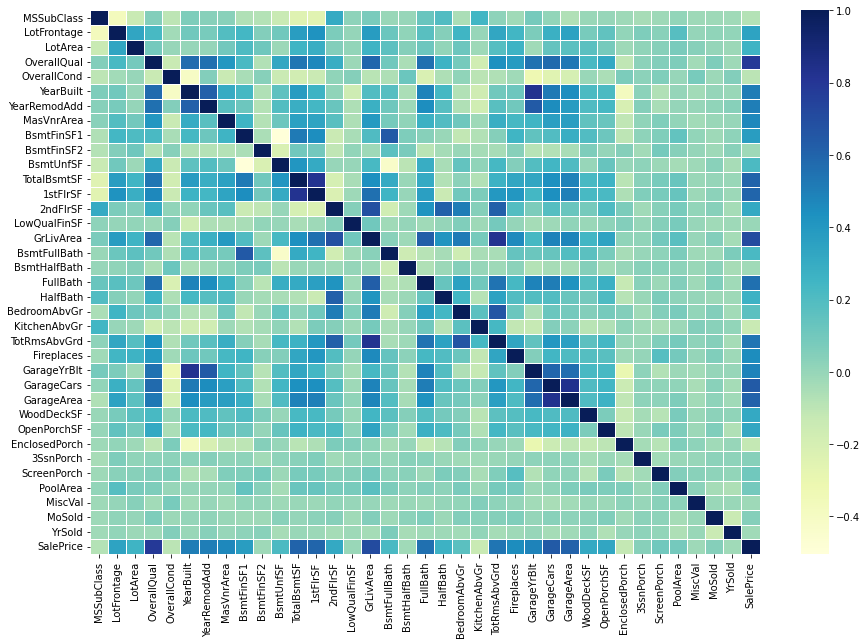

In [21]:
cor_matrix = df_train_numeric_cols.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_matrix,
                 annot=False,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')
plt.show()

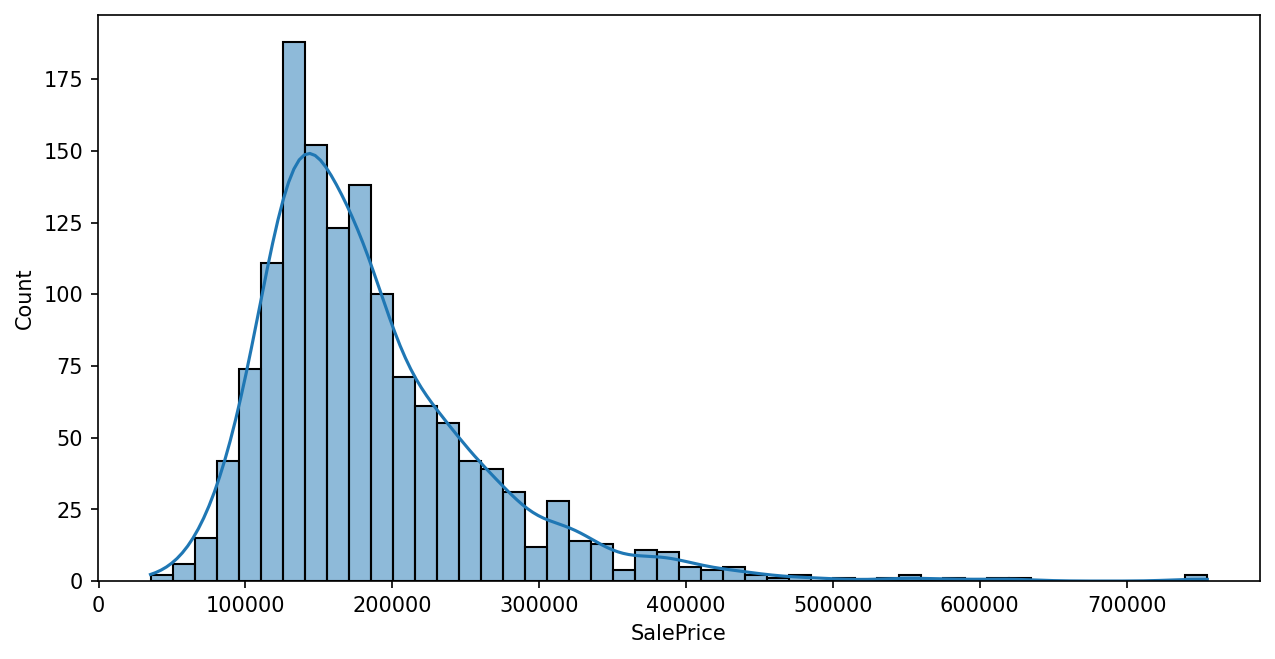

In [22]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(data=df_train, x='SalePrice', kde=True);

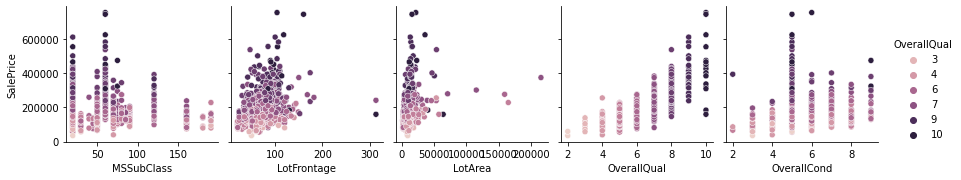

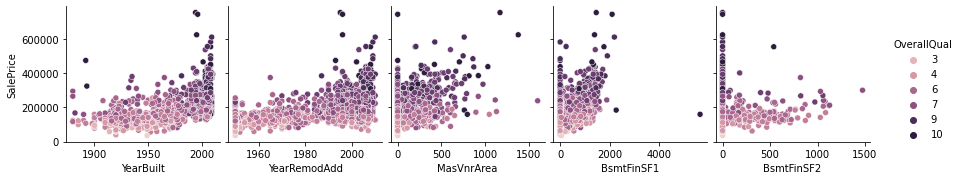

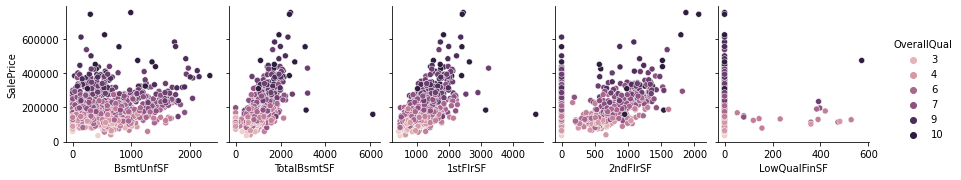

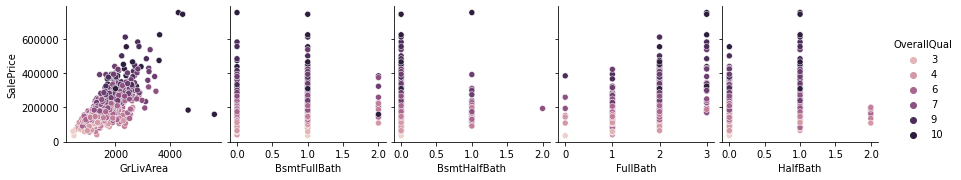

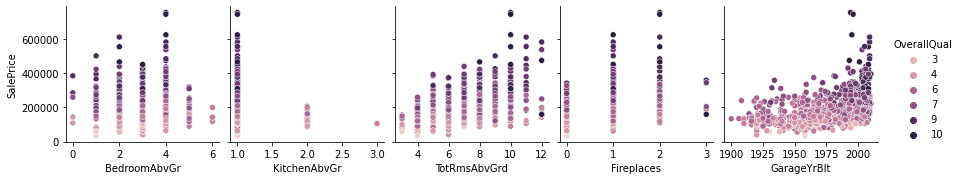

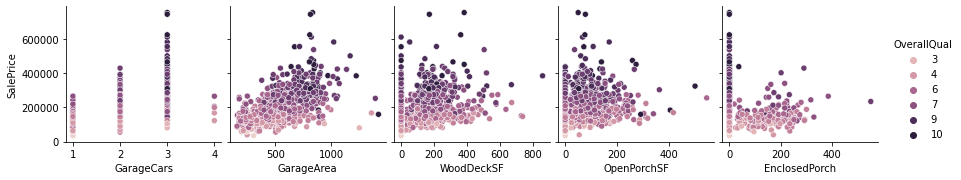

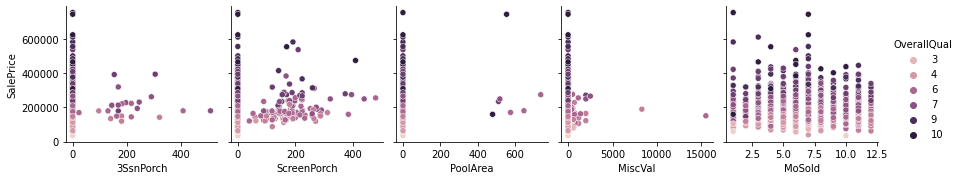

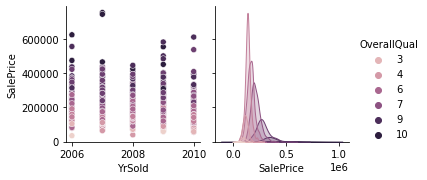

In [23]:
for i in range(0, len(df_train_numeric_cols.columns)-1, 5):
    sns.pairplot(data=df_train_numeric_cols,
                x_vars = df_train_numeric_cols.columns[i:i+5],
                y_vars = ['SalePrice'],
                hue='OverallQual')

In [24]:
#Get columns with dtype object or category
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
df_train_cat_cols = df_train.select_dtypes(include = ['object', 'category'])
df_train_cat_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal


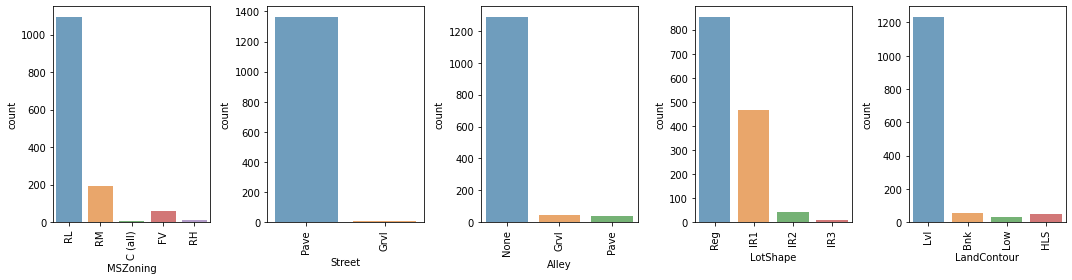

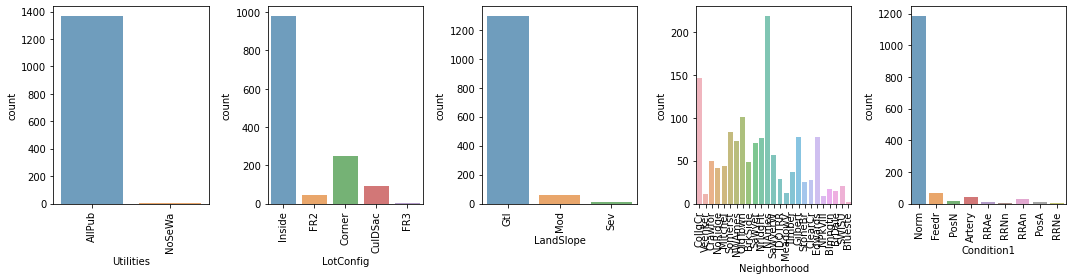

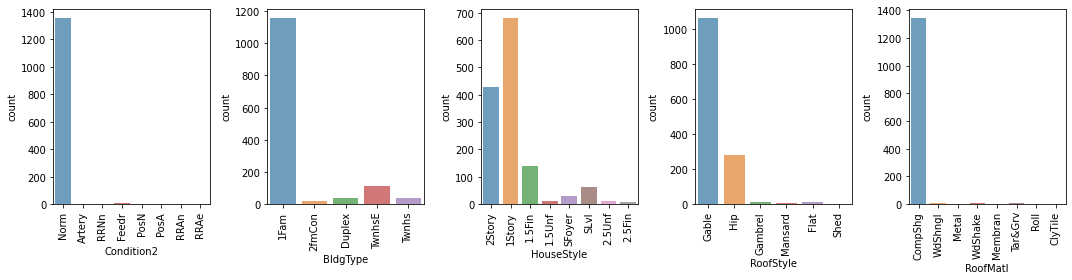

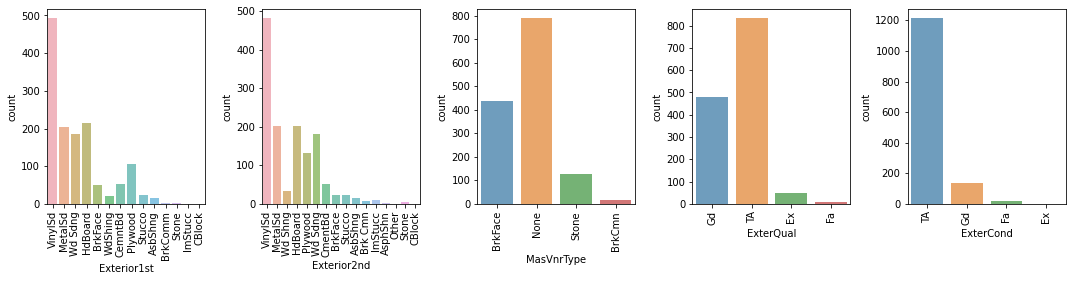

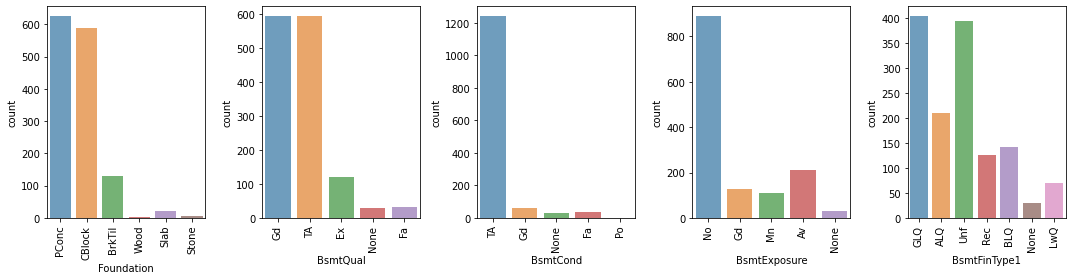

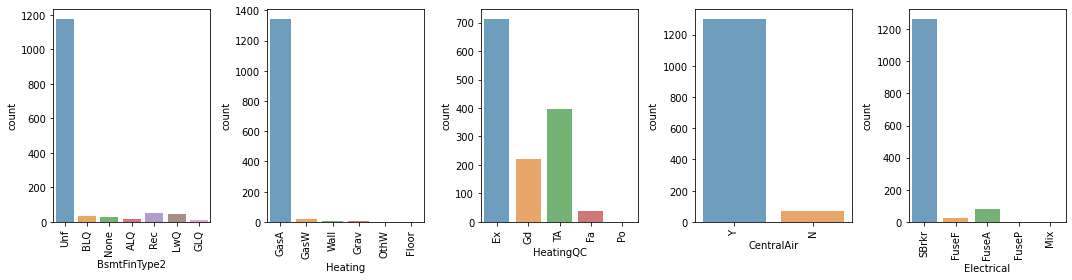

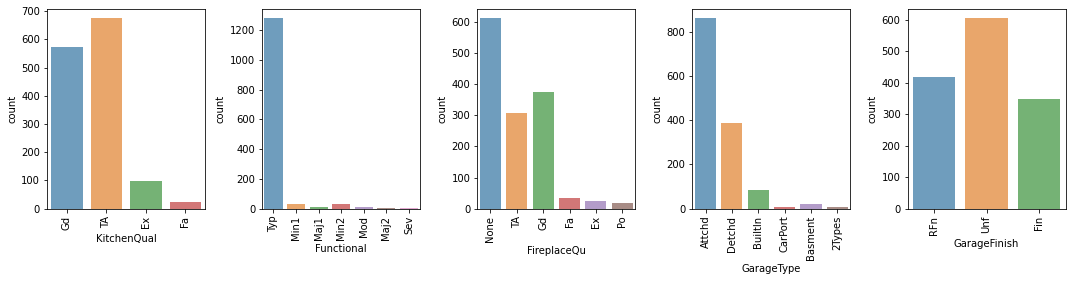

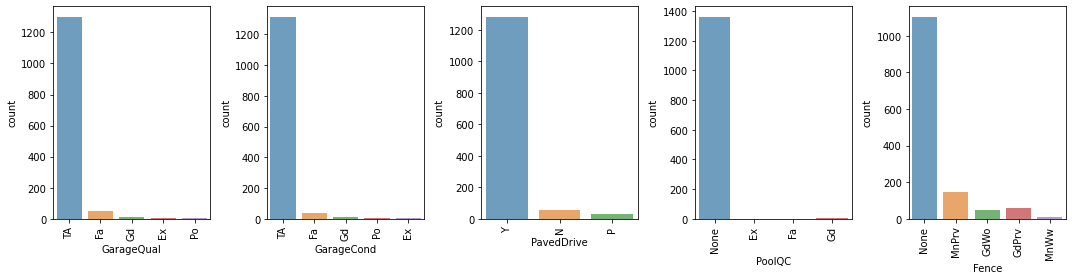

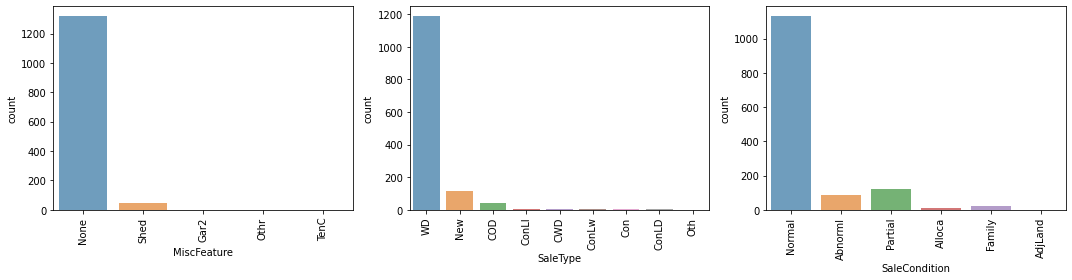

In [26]:
for i in range(0, len(df_train_cat_cols.columns), 5):
    subset = df_train_cat_cols.columns[i:i+5]
    fig, ax = plt.subplots(1, len(subset), figsize=(15, 4))
    
    for j, column in enumerate(subset):
        sns.countplot(data=df_train_cat_cols, x=column, alpha=0.7, ax=ax[j])
        ax[j].tick_params(axis='x', rotation=90)
      
    plt.tight_layout()
    plt.show()

## Train Test split

Recall that separate training and testing dtasets were provided, hence train_test_split will not be applied in this instance.

In [27]:
df_train.shape

(1370, 80)

In [28]:
df_test.shape

(1356, 79)

In [29]:
# Combine the datasets in order to ensure uniform encoding (dummy assignment)
combined_df = pd.concat([df_train, df_test], axis=0)

# Apply pd.get_dummies() to the combined dataset
combined_df_encoded = pd.get_dummies(combined_df, drop_first=True)

# Split back into training and test datasets
df_train_encoded = combined_df_encoded.iloc[:df_train.shape[0], :]
df_test_encoded = combined_df_encoded.iloc[df_train.shape[0]:, :]

In [30]:
df_train_encoded.shape

(1370, 255)

In [31]:
df_train_encoded.shape

(1370, 255)

In [32]:
df_test_encoded.shape

(1356, 255)

In [33]:
X_train = df_train_encoded.drop('SalePrice', axis=1)
y_train = df_train_encoded['SalePrice']

X_test = df_test_encoded.drop('SalePrice', axis=1)

In [34]:
X_train.shape

(1370, 254)

In [35]:
X_test.shape

(1356, 254)

## Scale data

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model

In [71]:
def train_and_evaluate_model(X_train_scaled, y_train, model_type):
    """
    Trains a regression model, generates predictions, and calculates predictive equality.
    
    Parameters:
        X_train_scaled (array-like): Scaled training features.
        y_train (array-like): Training target values.
        model_type (str): Type of model to use (default is 'SGDClassifier').
        
    Returns:
        tuple: A tuple containing the trained model.
    """
    if model_type == 'SGDRegressor':
        from sklearn.linear_model import SGDRegressor
        model = SGDRegressor()
        
    if model_type == 'Lasso':
        from sklearn.linear_model import Lasso
        model = Lasso(alpha=0.2, max_iter=10000)
        
    if model_type == 'Ridge':
        from sklearn.linear_model import Ridge
        model = Ridge()
        
    if model_type == 'AdaBoostRegressor':
        from sklearn.ensemble import AdaBoostRegressor
        model = AdaBoostRegressor()
    
    if model_type == 'GradientBoostingRegressor':
        from sklearn.ensemble import GradientBoostingRegressor
        model = GradientBoostingRegressor()
        
    if model_type == 'lightgbm':
        from lightgbm import LGBMRegressor
        model = LGBMRegressor()    
    
    model.fit(X_train_scaled, y_train)
    
    return model, model_type

In [64]:
# Create evaluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train_scaled)
    
    # Print metrics
    print('Model Name: ', model_type)
    print("Train MAE: ", round(mean_absolute_error(y_train, train_preds)))
    print('Train R^2: ', round(r2_score(y_train, train_preds),2)*100, "%")
    print("Train MSLE: ", round(mean_squared_log_error(y_train, train_preds),4))

In [65]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='SGDRegressor')
show_scores(model)

Model Name:  SGDRegressor
Train MAE:  304823
Train R^2:  -160984.0 %


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

SGD Regressor delivered highly inaccurate results

In [66]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='Lasso')
show_scores(model)

Model Name:  Lasso
Train MAE:  13154
Train R^2:  93.0 %
Train MSLE:  0.0114


In [67]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='Ridge')
show_scores(model)

Model Name:  Ridge
Train MAE:  13181
Train R^2:  93.0 %
Train MSLE:  0.0113


In [68]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='AdaBoostRegressor')
show_scores(model)

Model Name:  AdaBoostRegressor
Train MAE:  21403
Train R^2:  88.0 %
Train MSLE:  0.0298


In [69]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='GradientBoostingRegressor')
show_scores(model)

Model Name:  GradientBoostingRegressor
Train MAE:  10665
Train R^2:  97.0 %
Train MSLE:  0.0076


In [72]:
model, model_type = train_and_evaluate_model(X_train_scaled, y_train, model_type='lightgbm')
show_scores(model)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3424
[LightGBM] [Info] Number of data points in the train set: 1370, number of used features: 169
[LightGBM] [Info] Start training from score 185194.797080
Model Name:  lightgbm
Train MAE:  5775
Train R^2:  98.0 %
Train MSLE:  0.0029


In [78]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid you want to search
param_grid = {
    'num_leaves': [5, 10, 20, 30, 40],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [10, 50, 100, 200]
}

# Create the LightGBM regressor
lgbm_model = LGBMRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Get the best score
best_score = grid_search.best_score_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test)

print('Best params: ', best_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184510.445255
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[L

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 158
[LightGBM] [Info] Start training from score 184315.207117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3124
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 160
[LightGBM] [Info] Start training from score 187335.459854
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3124
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 160
[LightGBM] [Info] Start training from score 187335.459854
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3124
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 160
[LightGBM] [Info] Start training from score 187335.459854
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 158
[LightGBM] [Info] Start training from score 184315.207117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3124
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 160
[LightGBM] [Info] Start training from score 187335.459854
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184510.445255
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 158
[LightGBM] [Info] Start training from score 184315.207117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184510.445255
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 158
[LightGBM] [Info] Start training from score 184315.207117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3107
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184510.445255
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3108
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 185080.082117
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1096, number of used features: 159
[LightGBM] [Info] Start training from score 184732.791058
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the over

In [79]:
model_lgbm = LGBMRegressor(learning_rate = 0.1, n_estimators = 200, num_leaves = 5)
model_lgbm.fit(X_train_scaled, y_train)

show_scores(model_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3424
[LightGBM] [Info] Number of data points in the train set: 1370, number of used features: 169
[LightGBM] [Info] Start training from score 185194.797080
Model Name:  lightgbm
Train MAE:  10926
Train R^2:  96.0 %
Train MSLE:  0.0085


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_params_
best_model

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

In [45]:
model_fin = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 300)
model_fin.fit(X_train_scaled, y_train)

show_scores(model_fin)

Model Name:  GradientBoostingRegressor
Train MAE:  7149
Train R^2:  99.0 %
Train MSLE:  0.0034


In [46]:
# Get feature importances
feature_importances = model_fin.feature_importances_

# Match feature importances with their corresponding feature names
feature_names = X_train.columns

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top n important features
n = 10  # Change this value to display a different number of top features
#top_features = importance_df.drop(index, axis=1)
top_features = importance_df.head(n)
print(top_features)

         Feature  Importance
3    OverallQual    0.503429
15     GrLivArea    0.156480
25    GarageCars    0.046084
11   TotalBsmtSF    0.045979
8     BsmtFinSF1    0.039087
13      2ndFlrSF    0.034866
12      1stFlrSF    0.015894
2        LotArea    0.015214
6   YearRemodAdd    0.015174
5      YearBuilt    0.012843


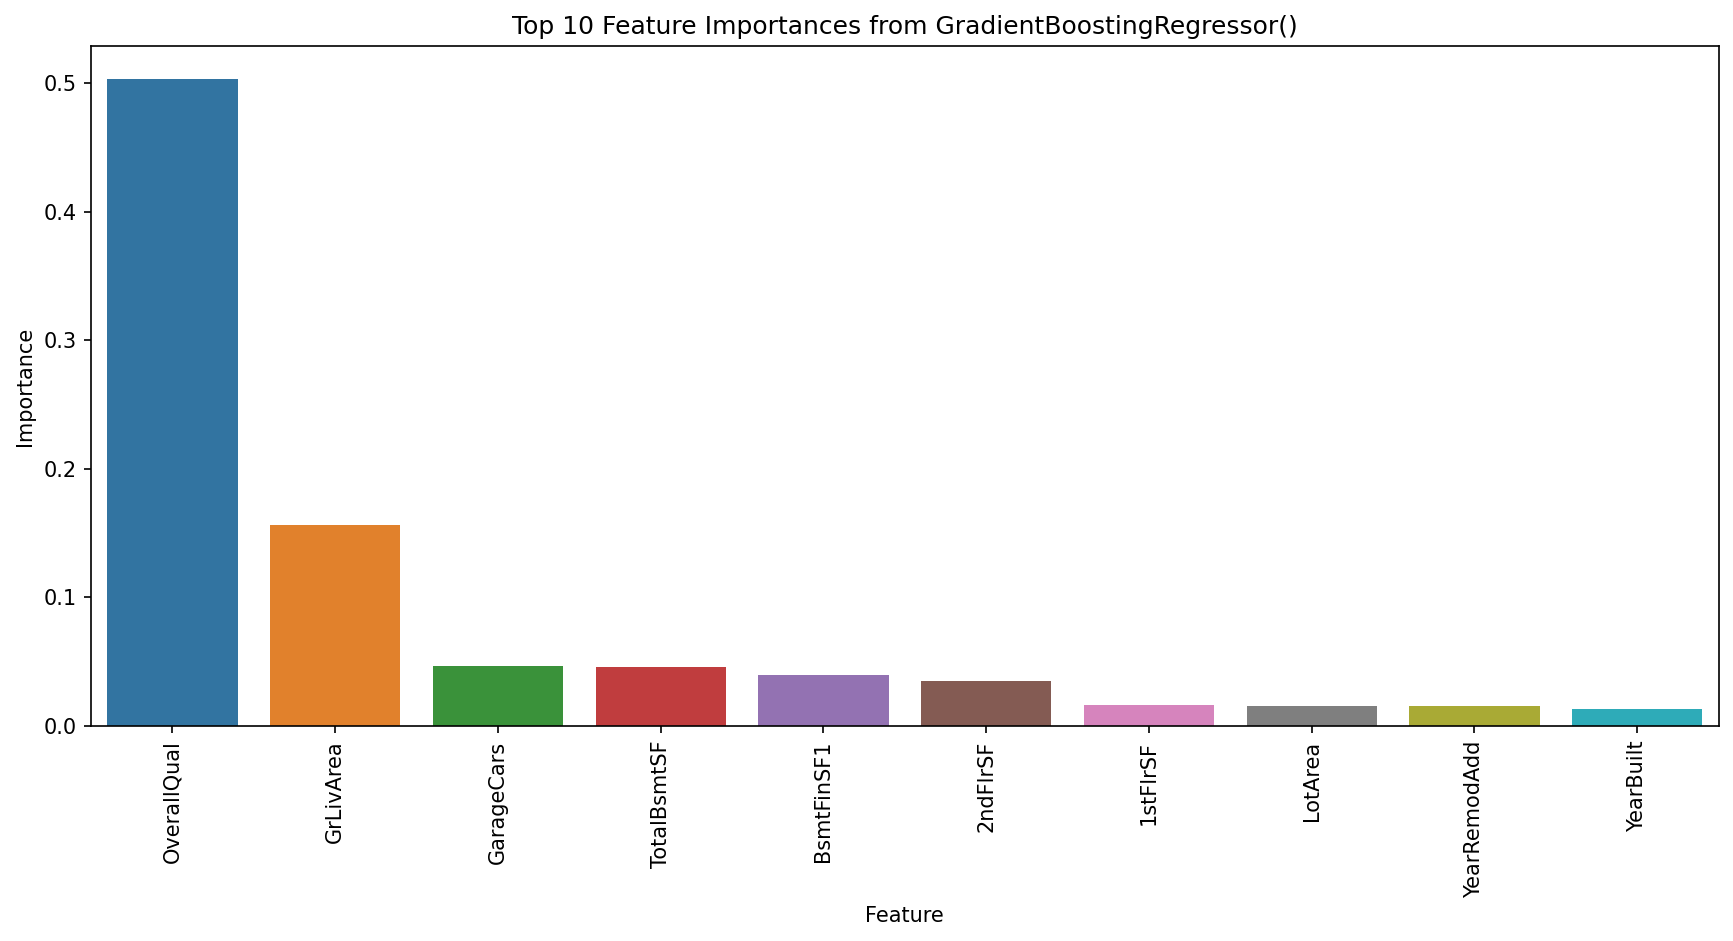

In [47]:
plt.figure(figsize=(14, 6), dpi=150)
sns.barplot(data=top_features, x='Feature', y='Importance')
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances from GradientBoostingRegressor()');

In [55]:
result_submit = pd.DataFrame({'Id': df_test.index, 'SalePrice': np.round(model_fin.predict(X_test),2)})
result_submit.set_index('Id', inplace=True)
result_submit.head(10)

/home/aapie/.local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,SalePrice
Id,
1461,318168.42
1462,261305.08
1463,489605.26
1464,481198.32
1465,307986.20
1466,567059.66
1467,285813.22
1468,561670.85
1469,306179.43
